In [41]:
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 10)

In [2]:
file = '../../../machine_learning_examples/linear_regression_class/data_1d.csv'

In [3]:
fhand = open(file)
TEMPx, TEMPy = [], []
for line in fhand:
    x, y = line.split(",")
    TEMPx.append(float(x))
    TEMPy.append(float(y))
X, Y = np.array(TEMPx), np.array(TEMPy)

In [4]:
N = len(X)

denominator 
> `denominator = ( N*np.dot(X, X) ) - X.sum()**2`

divide by N
> `denominator = np.dot(X, X) - X.sum()*X.mean()`

In [5]:
denominator = np.dot(X, X) - X.sum()*X.mean()

intuition
> `a = ( N\*np.dot(X,Y) - Y.sum()\*X.sum() ) / denominator`\
> `b = ( Y.sum()\*np.dot(X,X) - np.dot(X,Y)\*X.sum() ) / denominator`

divide by N
> `a = ( np.dot(X,Y) - Y.sum()\*X.mean() ) / denominator`\
> `b = ( Y.mean()\*np.dot(X,X) - np.dot(X,Y)\*X.mean() ) / denominator` 

\begin{align*}
a = \frac{\frac{N\sum x_iy_i - \sum x_i\sum y_i}{N^2}}{\frac{N \sum x_i^2 - (\sum x_i)^2}{N^2}}
= \frac{\frac{N\sum x_iy_i}{N} - \frac{\sum x_i\sum y_i}{N}}{\frac{N \sum x_i^2}{N} - \frac{(\sum x_i)^2}{N}};\\ dividing \quad by \quad N \quad
code: = \frac{\verb|np.dot(X, Y) - Y.sum() * X.mean()|}{\verb|denominator|}
\end{align*}

In [6]:
# fit
a = ( np.dot(X, Y) - Y.sum()*X.mean() ) / denominator
b = ( Y.mean()*np.dot(X,X) - np.dot(X,Y)*X.mean() ) / denominator

In [7]:
# predict
Yhat = a*X + b

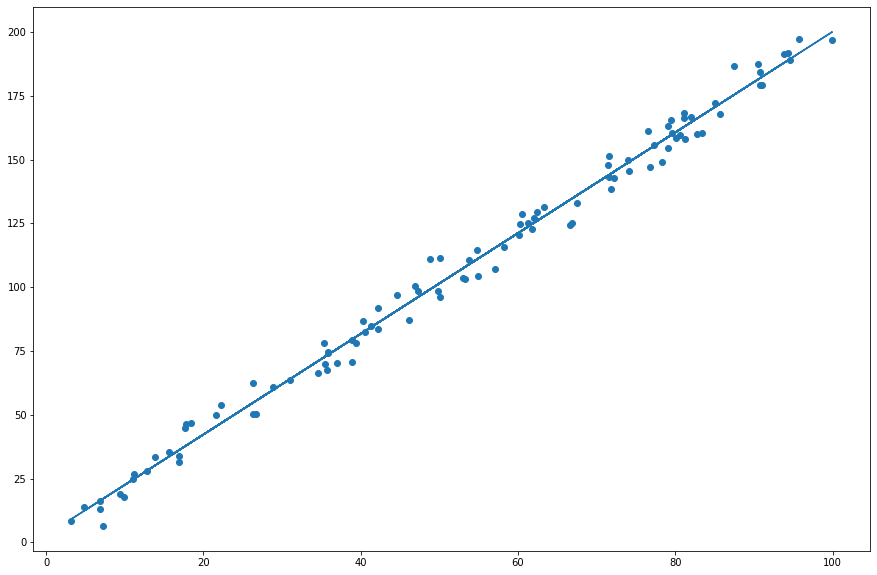

In [10]:
# plot
plt.scatter(X, Y)
plt.plot(X, Yhat)

### Calculate r2

\begin{equation}
r^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}; \\
\verb|d_yhat:| \sum (y_i - \hat{y}_i)^2 == squared\quad difference\quad between\quad data\quad y_i\quad and\quad prediction\quad \hat{y}_i\\
\verb|d_mean:| \sum (y_i - \bar{y})^2 == squared\quad difference\quad between\quad data\quad y_i\quad and\quad data.mean\quad \bar{y}
\end{equation}

In [21]:
# differences
d_yhat = np.dot((Y - Yhat), (Y - Yhat))
d_mean = np.dot((Y - Y.mean()), (Y - Y.mean()))

In [22]:
# r-squared
r2 = 1 - (d_yhat/d_mean)

### 1d linear regression function

In [46]:
def linreg(x, y):
    # yhat = a*X + b
    denominator = np.dot(x, x) - x.sum()*x.mean()
    a = ( np.dot(x, y) - y.sum()*x.mean() ) / denominator
    b = ( y.mean()*np.dot(x, x) - np.dot(x, y)*x.mean() ) / denominator
    
    # prediction
    yhat = a*x + b
    
    plt.scatter(x, y)
    plt.plot(x, yhat, 'c')
    
    return yhat

In [47]:
def r2(x, y):
    yhat = linreg(x, y)
    
    d_yhat = np.dot((y - yhat), (y - yhat))
    d_mean = np.dot((y - y.mean()), (y - y.mean()))
    
    return 1 - (d_yhat/d_mean)

0.9911838202977805

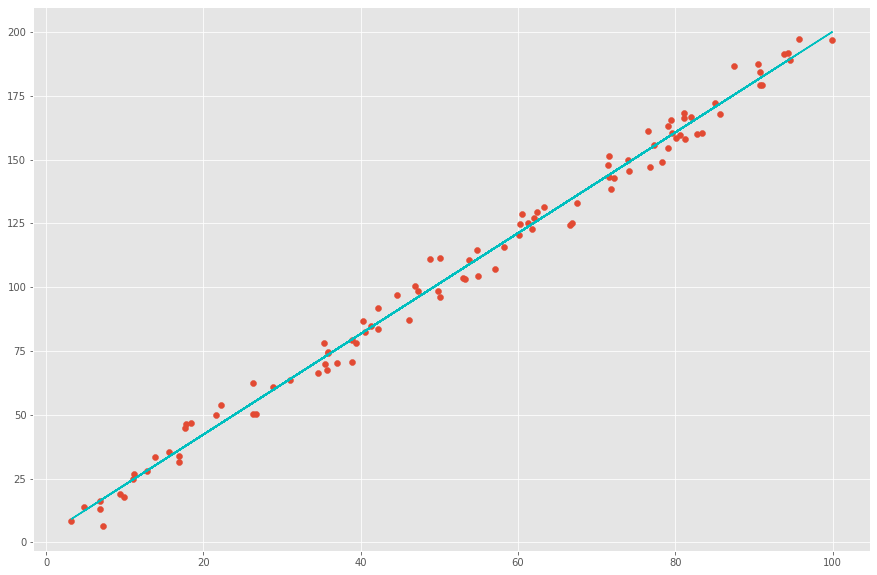

In [48]:
r2(X, Y)